In [52]:
import numpy as np
import yfinance as yf
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import IchimokuLibrary
from itertools import product
import arch.bootstrap as ab

In [53]:
START = "2015-01-01"
END = "2025-01-01"
TICKER = "^GSPC"
TITLE = TICKER + " - " + (datetime.now()).strftime("%Y-%m-%d - %H:%M:%S")
file = "results/covid/no_transaction_costs/in_sample/data2.xlsx"

In [54]:
data = pd.read_excel(file,header=[0,1,2], index_col=[0,1,2,3])

In [55]:
# data = pd.read_excel("confidence_intervals_sharpe.xlsx",header=[0,1,2], index_col=[0,1,2,3])

In [56]:
(data.xs("Sharpe",axis=1, level=2).xs("Lower",axis=0,level=3)).shape

(600, 13)

In [57]:
(data.xs("Sharpe", level=2, axis=1).idxmax().values)

array([(11, 25, 61, 'Upper'), (5, 31, 51, 'Upper'), (9, 25, 63, 'Upper'),
       (9, 25, 61, 'Upper'), (13, 23, 61, 'Upper'), (13, 25, 63, 'Upper'),
       (13, 25, 39, 'Upper'), (5, 31, 49, 'Upper'), (9, 25, 63, 'Upper'),
       (7, 31, 35, 'Upper'), (9, 25, 63, 'Upper'), (5, 27, 63, 'Upper'),
       (5, 27, 63, 'Upper')], dtype=object)

In [58]:
sharpes = ((data.xs("Sharpe", level=2, axis=1).xs("Upper", level=3, axis=0) + data.xs("Sharpe", level=2, axis=1).xs("Lower", level=3, axis=0)) / 2)

In [59]:
sharpes.idxmax()

ex_l_1  en_l_1      (11, 25, 61)
        en_l_2       (5, 31, 35)
        en_l_12      (9, 25, 51)
        en_l_123     (9, 25, 57)
ex_l_2  en_l_1      (13, 25, 63)
        en_l_12     (13, 25, 43)
        en_l_123    (13, 25, 39)
ex_l_3  en_l_2       (5, 31, 35)
        en_l_12     (11, 25, 59)
        en_l_123     (7, 31, 35)
ex_l_4  en_l_12      (9, 25, 51)
        en_l_123     (5, 27, 35)
ex_l_5  en_l_123     (5, 27, 61)
dtype: object

In [60]:
(sharpes.stack([0,1]).nlargest(20).sort_values(ascending=False)).reset_index()

C:\Users\olive\AppData\Local\Temp\ipykernel_29024\2363349858.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  (sharpes.stack([0,1]).nlargest(20).sort_values(ascending=False)).reset_index()


,level_0,level_1,level_2,level_3,level_4,0
0,5,31,35,ex_l_3,en_l_2,1.459815
1,7,31,35,ex_l_3,en_l_2,1.459815
2,9,31,35,ex_l_3,en_l_2,1.459815
3,11,31,35,ex_l_3,en_l_2,1.459815
4,13,31,35,ex_l_3,en_l_2,1.459815
5,5,31,49,ex_l_3,en_l_2,1.445836
6,7,31,49,ex_l_3,en_l_2,1.445836
7,9,31,49,ex_l_3,en_l_2,1.445836
8,11,31,49,ex_l_3,en_l_2,1.445836
9,13,31,49,ex_l_3,en_l_2,1.445836


In [61]:
price_data = pd.read_csv("data2.csv",parse_dates=True,index_col=0)[:"2020-01-1"]
print(price_data)
returns = np.log(price_data["Close"] / price_data["Close"].shift(1)).dropna()

                  Close         High          Low         Open      Volume
Date                                                                      
2015-01-02  2058.199951  2072.360107  2046.040039  2058.899902  2708700000
2015-01-05  2020.579956  2054.439941  2017.339966  2054.439941  3799120000
2015-01-06  2002.609985  2030.250000  1992.439941  2022.150024  4460110000
2015-01-07  2025.900024  2029.609985  2005.550049  2005.550049  3805480000
2015-01-08  2062.139893  2064.080078  2030.609985  2030.609985  3934010000
...                 ...          ...          ...          ...         ...
2019-12-24  3223.379883  3226.429932  3220.510010  3225.449951  1296530000
2019-12-26  3239.909912  3240.080078  3227.199951  3227.199951  2164540000
2019-12-27  3240.020020  3247.929932  3234.370117  3247.229980  2429150000
2019-12-30  3221.290039  3240.919922  3216.570068  3240.090088  3021720000
2019-12-31  3230.780029  3231.719971  3212.030029  3215.179932  2894760000

[1258 rows x 5 columns]


<Axes: xlabel='Date'>

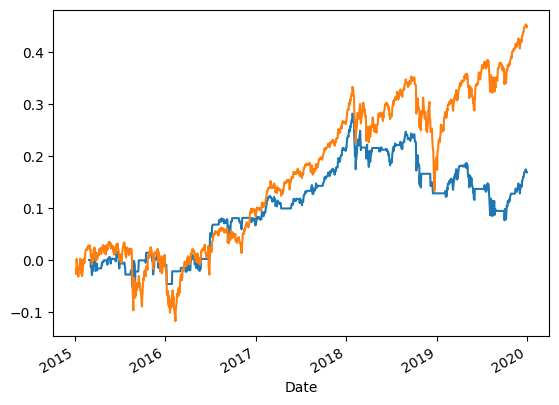

In [62]:
# strat = IchimokuLibrary.trade()

IchimokuLibrary.trade(returns, "en_l_1","ex_l_1",7,19,35).cumsum().plot()
returns.cumsum().plot()

In [63]:
data.xs("Sharpe", level=2, axis=1).xs("Lower", level=3, axis=0)

ex_l_1                                  ex_l_2            \
            en_l_1    en_l_2   en_l_12  en_l_123    en_l_1   en_l_12   
5  17 35 -0.814498 -0.611011 -1.145685 -1.148733 -0.861856 -1.222169   
      37 -0.815179 -0.613199 -1.146639 -1.125031 -0.862579 -1.257158   
      39 -0.815863 -0.628692 -1.160987 -1.125970 -0.863304 -1.258208   
      41 -0.840927 -0.631315 -1.161957 -1.122213 -0.860635 -1.268358   
      43 -0.830306 -0.631846 -1.139077 -1.115095 -0.861626 -1.240992   
...            ...       ...       ...       ...       ...       ...   
13 31 55 -0.650129  0.318593 -0.616262 -0.516573 -0.870311 -1.220687   
      57 -0.678602  0.327879 -0.616798 -0.517024 -0.871064 -1.199872   
      59 -0.727086  0.326522 -0.617336 -0.517475 -0.929954 -1.200907   
      61 -0.727718  0.326794 -0.617874 -0.517928 -0.930761 -1.201945   
      63 -0.707669  0.348754 -0.618414 -0.512061 -0.933083 -1.202986   

                      ex_l_3                        ex_l_4              ex_l_5  
          en_l_123    en_l_2   en_l_12  en_l_123   en_l_12  en_l_123  en_l_123  
5  17 35 -1.395376 -0.626710 -0.916882 -0.947318 -1.210664 -1.219744 -1.272804  
      37 -1.303350 -0.627234 -0.917647 -0.965998 -1.211672 -1.220760 -1.264382  
      39 -1.304437 -0.627759 -0.918413 -0.966805 -1.212683 -1.221778 -1.267185  
      41 -1.329249 -0.628286 -0.919182 -0.967614 -1.213696 -1.222799 -1.243632  
      43 -1.330363 -0.628814 -0.919952 -0.962622 -1.202033 -1.223823 -1.188853  
...            ...       ...       ...       ...       ...       ...       ...  
13 31 55 -1.238028  0.677748 -0.231401 -0.151522 -0.632451 -0.632451 -0.374733  
      57 -1.217093  0.678324 -0.231605 -0.148056 -0.633000 -0.633000 -0.394187  
      59 -1.218143  0.683174 -0.231811 -0.148189 -0.633550 -0.633550 -0.394533  
      61 -1.217673  0.712868 -0.232017 -0.149868 -0.634102 -0.634102 -0.279444  
      63 -1.244445  0.713478 -0.232223 -0.152961 -0.634655 -0.634655 -0.297555  

[600 rows x 13 columns]